In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from collections import Counter

In [ ]:
class Node():
  def __init__(self):
    self.d_node=False
    self.left=None
    self.middle=None
    self.right=None
    self.attr=None
    self.label=None

In [ ]:
class DescisionTree():
  def __init__(self):
    self.build=0

  def entropy(self,data_frame):
    if(data_frame.ndim==1):
      return 0
    labels = data_frame[:,-1]


    #my code//////////////////////////////////////

    arr=[]
    a=Counter(labels).most_common()
    ent=0
    for i in range(len(a)):
      arr.append(a[i][1])
    for i in range(len(arr)):
      ent+=(0-(arr[i]/sum(arr))*np.log2((arr[i]/sum(arr))))
    #print(ent)

    #my code////////////////////////////////////////

    num_of_labels = labels.size
    num_of_zeroes = 0
    num_of_ones = 0

    for i in labels:
      if(i==0):
        num_of_zeroes+=1
      if(i==1):
        num_of_ones+=1

    if(num_of_zeroes==0 or num_of_ones==0):
      return 0

    fraction_of_zeroes = num_of_zeroes/num_of_labels
    fraction_of_ones = num_of_ones/num_of_labels

    cal_entropy = - fraction_of_zeroes * np.log2(fraction_of_zeroes) - fraction_of_ones * np.log2(fraction_of_ones)
    #print(cal_entropy," ",ent)

    return cal_entropy

  def gini_coefficient(self,data_frame):
    if(data_frame.ndim==1):
      return 0
    labels = data_frame[:,-1]
    num_of_labels = labels.size
    num_of_zeroes = 0
    num_of_ones = 0

    for i in labels:
      if(i==0):
        num_of_zeroes+=1
      if(i==1):
        num_of_ones+=1

    if(num_of_zeroes==0 or num_of_ones==0):
      return 0

    fraction_of_zeroes = num_of_zeroes/num_of_labels
    fraction_of_ones = num_of_ones/num_of_labels

    gini_coeff = 1-(fraction_of_zeroes*fraction_of_zeroes+fraction_of_ones*fraction_of_ones)

    return gini_coeff

  def train(self,data_frame,featureSet,type="Not_Gini"):
    self.best_feature_to_split = -1
    best_feature_index = -1
    n2=len(data_frame[0])



    if(type=="Not_Gini"):
      initial_entropy = self.entropy(data_frame)
      if initial_entropy==0:
        df_length = len(data_frame[0])
        self.label = data_frame[0][df_length-1]
        # print(data_frame)
        # print()
        #print(len(data_frame[0])==17)
        #print()
        return -1
      # if(featureSet.size==0):
      #   print (data_frame)
      #   self.label = np.bincount(data_frame[:,-1]).argmax()
      #   return


      information_gain=np.array([])


      # loop = 0

      for feature in featureSet:
        arr1=[]
        arr2=[]
        arr3=[]
        for x in data_frame:
          if x[feature]==0:
            arr1.append(x)
        arr1=np.array(arr1)
        ratio_set1 = arr1.shape[0]/n2
        for x in data_frame:
          if x[feature]==1:
            arr2.append(x)
        arr2=np.array(arr2)
        ratio_set2 = arr2.shape[0]/n2
        for x in data_frame:
          if x[feature]==2:
            arr3.append(x)
        arr3=np.array(arr3)
        ratio_set3 = arr3.shape[0]/n2

        information_gain = np.append(information_gain, ratio_set1 * self.entropy(arr1) + ratio_set2 * self.entropy(arr2) + ratio_set3 * self.entropy(arr3))

      min=0
      min_gain=information_gain[0]
      for i in range(0,len(information_gain)):
        if information_gain[i]<min_gain:
          min=i
          min_gain=information_gain[i]
      #best_feature_index = information_gain.argmin()
      #print(best_feature_index==min)
      self.best_feature_to_split = featureSet[min]

    '''if(type=="Gini"):

      gini_before_classification = self.gini_coefficient(data_frame)
      if(gini_before_classification==0):
        self.label = data_frame[0][-1]
        return
      if(featureSet.size==0):
        self.label = np.bincount(data_frame[:,-1]).argmax()
        return

      #Find the best node

      gini_coefficients = np.array([])
      for feature in featureSet:
        set0 = np.array([x for x in data_frame if x[feature]==0])
        ratio_set0 = set0.shape[0]/num_elem_in_data_set
        set1 = np.array([x for x in data_frame if x[feature]==1])
        ratio_set1 = set1.shape[0]/num_elem_in_data_set
        set2 = np.array([x for x in data_frame if x[feature]==2])
        ratio_set2 = set2.shape[0]/num_elem_in_data_set
        gini_coefficients = np.append(gini_coefficients,ratio_set0 * self.gini_coefficient(set0) + ratio_set1 * self.gini_coefficient(set1) + ratio_set2 * self.gini_coefficient(set2))

      best_feature_index = gini_coefficients.argmin()
      self.best_feature_to_split = featureSet[best_feature_index]'''

    df_left=[]
    df_mid=[]
    df_right=[]
    for x in data_frame:
      if x[self.best_feature_to_split]==0:
        df_left.append(x)
    df_left=np.array(df_left)
    for x in data_frame:
      if x[self.best_feature_to_split]==1:
        df_mid.append(x)
    df_mid=np.array(df_mid)
    for x in data_frame:
      if x[self.best_feature_to_split]==2:
        df_right.append(x)
    df_right=np.array(df_right)

    #split_data_0 = np.array([x for x in data_frame if x[self.best_feature_to_split]==0])
    #print(df_left==split_data_0)
    #split_data_1 = np.array([x for x in data_frame if x[self.best_feature_to_split]==1])
    #split_data_2 = np.array([x for x in data_frame if x[self.best_feature_to_split]==2])

    updated_attr = np.delete(featureSet,min)

    #print("New Feature set: ")
    #print(new_feature_set)

    temp_arr=[]
    temp_arr=np.asarray(data_frame[:,-1])
    #max_occuring_label_before_classification = np.bincount(data_frame[:,-1]).argmax()
    molbc=Counter(temp_arr).most_common(1)[0][0]
    #print()

    if((df_left.ndim==1) or (df_mid.ndim==1) or (df_right.ndim==1)):
      self.label = molbc
      self.best_feature_to_split = -1
      return -1

    self.left = DescisionTree()
    self.middle = DescisionTree()
    self.right = DescisionTree()

    self.left.train(df_left,updated_attr,type)
    self.middle.train(df_mid,updated_attr,type)
    self.right.train(df_right,updated_attr,type)

    return -1

  def identifier(self,test_row):
    if(self.best_feature_to_split==-1):
      return self.label

    best_feature_value = test_row[self.best_feature_to_split]

    if(best_feature_value==0):
      return self.left.identifier(test_row)

    if(best_feature_value==1):
      return self.middle.identifier(test_row)

    if(best_feature_value==2):
      return self.right.identifier(test_row)

    return -1

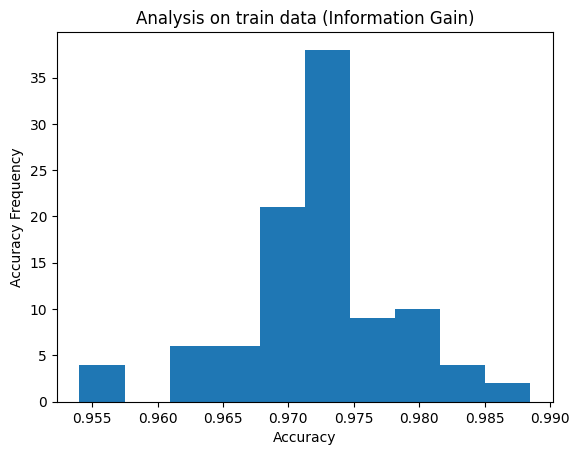

Average accuracy for information gain on train data:  0.9718678160919539
Standard deviation of accuracies for information gain on train data:  0.006260082368394465


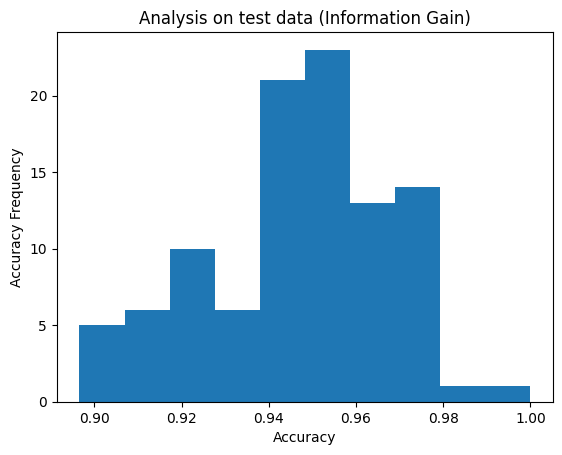

Average accuracy for information gain on test data:  0.9466666666666665
Standard deviation of accuracies for information gain on test data:  0.02324682451532341


'\nplt.hist(accuracy_train_gini)\nplt.title(\'Analysis on train data (Gini)\')\nplt.xlabel(\'Accuracy\')\nplt.ylabel(\'Accuracy Frequency\')\nplt.show()\nprint("Average accuracy for gini on train data: ",np.mean(accuracy_train_gini))\nprint("Standard deviation of accuracies for gini on train data: ",np.std(accuracy_train_gini))\n\n\nplt.hist(accuracy_test_gini)\nplt.title(\'Analysis on test data (Gini)\')\nplt.xlabel(\'Accuracy\')\nplt.ylabel(\'Accuracy Frequency\')\nplt.show()\nprint("Average accuracy for gini on test data: ",np.mean(accuracy_test_gini))\nprint("Standard deviation of accuracies for gini on test data: ",np.std(accuracy))\n'

In [ ]:
data_frame = pd.read_csv('/content/hw3_house_votes_84.csv')

data = data_frame.to_numpy()

total_num = data.shape[0]

classifier = DescisionTree()

accuracy_train_total = np.array([])
accuracy_test_total = np.array([])

num_features = data.shape[1]-1

for iter in np.arange(100):
  #print(iter)

  data = shuffle(data,random_state=iter)

  train_data_frame = data[:int(0.8*total_num),:]
  #print(len(train_data_frame[0]))
  test_data_frame = data[int(0.8*total_num):,:]
  train_labels = train_data_frame[:,-1]
  test_labels = test_data_frame[:,-1]
  #print('start','\n')

  classifier.train(train_data_frame,np.arange(num_features))

  y_train_pred = np.array([])
  pred_train=[]
  pred_test=[]
  acc_train=0
  # for i in np.arange(int(0.8*total_num)):
  #   y_train_pred = np.append(y_train_pred,classifier.predict(data[i]))

  for i in train_data_frame:

    pred_train.append(classifier.identifier(i))
    #y_train_pred = np.append(y_train_pred,classifier.identifier(i))


  for i in range(len(pred_train)):
    if pred_train[i]==train_labels[i]:
      acc_train+=1
  acc_train=(acc_train/len(pred_train))

  # accuracy = np.sum(train_labels==pred_train)/len(pred_train)
  # print(accuracy==acc_train)
  # print()
  # #print()

  accuracy_train_total = np.append(accuracy_train_total,acc_train)
  y_test_pred = np.array([])

  # for i in np.arange(int(0.8*total_num),total_num):
  #   y_test_pred = np.append(y_test_pred,classifier.predict(data[i]))

  acc_test=0
  for i in test_data_frame:

    pred_test.append(classifier.identifier(i))
    #y_test_pred = np.append(y_test_pred,classifier.identifier(i))
  for i in range(len(pred_test)):
    if pred_test[i]==test_labels[i]:
      acc_test+=1
  acc_test=(acc_test/len(pred_test))

  # accuracy = np.sum(test_labels==pred_test)/len(pred_test)
  # print(accuracy==acc_test)
  # print()

  accuracy_test_total = np.append(accuracy_test_total,acc_test)
'''
  classifier.train(train_data_frame,np.arange(num_features),type="Gini")

  y_train_pred = np.array([])
  for i in np.arange(int(0.8*total_num)):
    y_train_pred = np.append(y_train_pred,classifier.predict(data[i]))

  accuracy = np.sum(train_labels==y_train_pred)/y_train_pred.size

  accuracy_train_gini = np.append(accuracy_train_gini,accuracy)
  y_test_pred = np.array([])
  for i in np.arange(int(0.8*total_num),total_num):
    y_test_pred = np.append(y_test_pred,classifier.predict(data[i]))

  accuracy = np.sum(test_labels==y_test_pred)/y_test_pred.size

  accuracy_test_gini = np.append(accuracy_test_gini,accuracy)

'''
plt.hist(accuracy_train_total)
plt.title('Analysis on train data (Information Gain)')
plt.xlabel('Accuracy')
plt.ylabel('Accuracy Frequency')
plt.show()
print("Average accuracy for information gain on train data: ",np.mean(accuracy_train_total))
print("Standard deviation of accuracies for information gain on train data: ",np.std(accuracy_train_total))

plt.hist(accuracy_test_total)
plt.title('Analysis on test data (Information Gain)')
plt.xlabel('Accuracy')
plt.ylabel('Accuracy Frequency')
plt.show()
print("Average accuracy for information gain on test data: ",np.mean(accuracy_test_total))
print("Standard deviation of accuracies for information gain on test data: ",np.std(accuracy_test_total))

'''
plt.hist(accuracy_train_gini)
plt.title('Analysis on train data (Gini)')
plt.xlabel('Accuracy')
plt.ylabel('Accuracy Frequency')
plt.show()
print("Average accuracy for gini on train data: ",np.mean(accuracy_train_gini))
print("Standard deviation of accuracies for gini on train data: ",np.std(accuracy_train_gini))


plt.hist(accuracy_test_gini)
plt.title('Analysis on test data (Gini)')
plt.xlabel('Accuracy')
plt.ylabel('Accuracy Frequency')
plt.show()
print("Average accuracy for gini on test data: ",np.mean(accuracy_test_gini))
print("Standard deviation of accuracies for gini on test data: ",np.std(accuracy))
'''